# Brain Stroke

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and is supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.

# Import Dependencies

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import Data

In [45]:
dataset=pd.read_csv('BrainStroke.csv')

# EDA

# Attribute Information of Dataset

1) gender: "Male", "Female" or "Other"
2) age: age of the patient
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 5) Ever-married: "No" or "Yes"
6) work type: "children", "Govtjov", "Never worked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"
8) avg glucose level: average glucose level in blood
9) BMI: body mass index
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) stroke: 1 if the patient had a stroke or 0 if not

In [46]:
dataset.shape

(4981, 11)

In [47]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [48]:
#checking the data type of each column
dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [49]:
#checking for null values in the dataset
dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [50]:
#exploring the dataset

for col in dataset.columns:
    print(f'{col} : {dataset[col].unique()}')

gender : ['Male' 'Female']
age : [6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 1.32e+00 1.60e-01 4.80e-01]
hypertension : [0

In [51]:
#replacing the object values to integer values
dataset.replace({'Male':1 ,'Female':0},inplace=True)
dataset.replace({'Yes':1 ,'No':0},inplace=True)
dataset.replace({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4},inplace=True)
dataset.replace({'Urban':0 ,'Rural':1},inplace=True)
dataset.replace({'formerly smoked':1 ,'never smoked':2 ,'smokes':3, 'Unknown':4},inplace=True)

In [52]:
dataset.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [53]:
#seperating the patients based on stroke
patients_not_having_stroke=dataset[dataset['stroke']==0]
patients_having_stroke=dataset[dataset['stroke']==1]
patients_not_having_stroke.shape,patients_having_stroke.shape

((4733, 11), (248, 11))

([<matplotlib.patches.Wedge at 0x2115efe2ad0>,
 [Text(-1.0865708998339851, 0.17135833692576546, 'target=0'),
  Text(1.086570903844916, -0.17135831149273842, 'taget=1')],
 [Text(-0.5926750362730827, 0.09346818377769024, '95.02'),
  Text(0.5926750384608632, -0.09346816990513003, '4.98')])

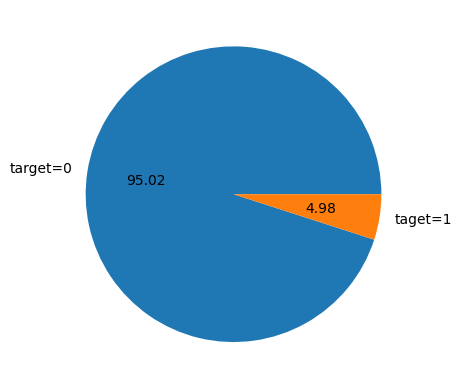

In [54]:
plt.pie([4733,248], labels=['target=0','taget=1'], autopct='%.2f')

# over sampling

In [55]:
dataset1=patients_having_stroke.sample(4733,replace=True)
dataset1.shape

(4733, 11)

In [56]:
dataset2=pd.concat([patients_not_having_stroke,dataset1])

In [57]:
patients_not_having_stroke,patients_having_stroke=dataset2['stroke'].value_counts()
patients_not_having_stroke,patients_having_stroke

(4733, 4733)

([<matplotlib.patches.Wedge at 0x2116102cee0>,
 [Text(6.735557395310444e-17, 1.1, 'target=0'),
  Text(-2.0206672185931328e-16, -1.1, 'taget=1')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

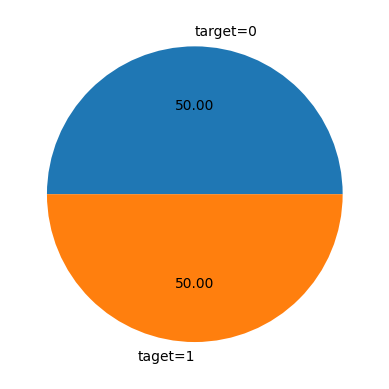

In [58]:
plt.pie(x=[patients_not_having_stroke,patients_having_stroke], labels=['target=0','taget=1'], autopct='%.2f')

In [59]:
data=dataset2.drop(columns=['stroke'])
target=dataset2['stroke']

# Spliting the data for training and testing

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.2)

In [61]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (7572, 10)
The shape of ytrain is (7572,)
The shape of xtest is (1894, 10)
The shape of ytest is (1894,)


In [62]:
#function to give accuracy,heatmap and confusion matrix
def Train_model(Algorithm_name,Algorithm):
    model=Algorithm
    model.fit(xtrain,ytrain)
    result=model.score(xtest,ytest)
    accuracy=result*100
    predicted_values=model.predict(xtest)
    predicted_values=predicted_values.astype(int)
    con_matrix=confusion_matrix(ytest,predicted_values)
    sns.heatmap(con_matrix,annot=True)
    print(f"BY using {Algorithm_name} Algorithm we get the accuray of {np.round(accuracy,2)}%")
    print(classification_report(ytest,predicted_values))

# Linear Regression

BY using Linear Regression Algorithm we get the accuray of 35.81%
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       958
           1       0.89      0.01      0.02       936

    accuracy                           0.51      1894
   macro avg       0.70      0.50      0.35      1894
weighted avg       0.70      0.51      0.35      1894



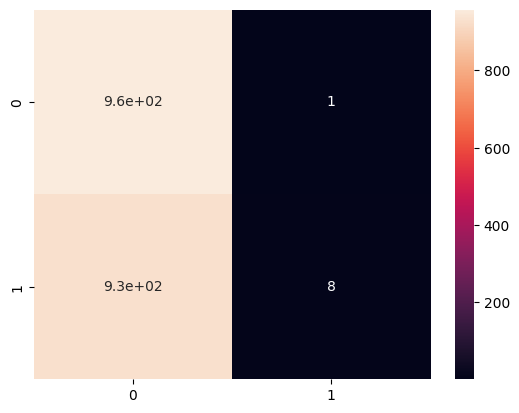

In [63]:
Train_model("Linear Regression",LinearRegression())

# Logistic Regression

BY using Logistic Regression Algorithm we get the accuray of 75.92%
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       958
           1       0.74      0.78      0.76       936

    accuracy                           0.76      1894
   macro avg       0.76      0.76      0.76      1894
weighted avg       0.76      0.76      0.76      1894



C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


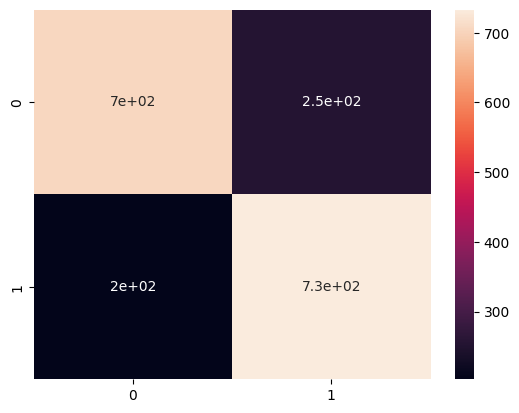

In [64]:
Train_model("Logistic Regression",LogisticRegression())

# Decision Tree Classifier

BY using Decision Tree Classifier Algorithm we get the accuray of 97.78%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       958
           1       0.96      1.00      0.98       936

    accuracy                           0.98      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.98      0.98      0.98      1894



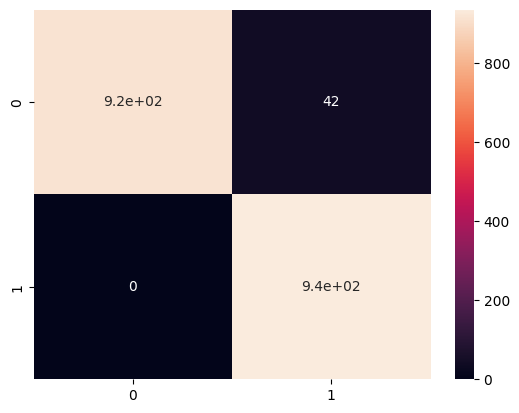

In [89]:
Train_model("Decision Tree Classifier",DecisionTreeClassifier())

# Random Forest Classifier

BY using Random Forest Classifier Algorithm we get the accuray of 99.16%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       958
           1       0.98      1.00      0.99       936

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



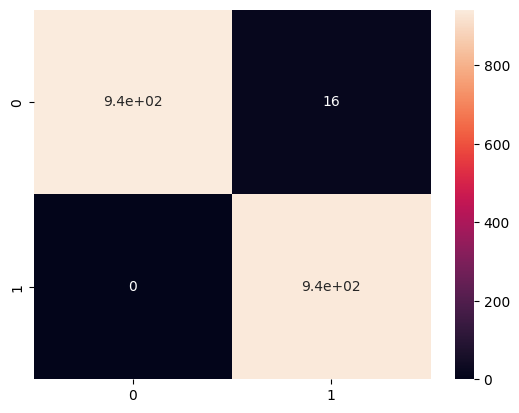

In [102]:
Train_model("Random Forest Classifier",RandomForestClassifier(n_estimators=60))

BY using SVC Algorithm we get the accuray of 98.94%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       958
           1       0.98      1.00      0.99       936

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



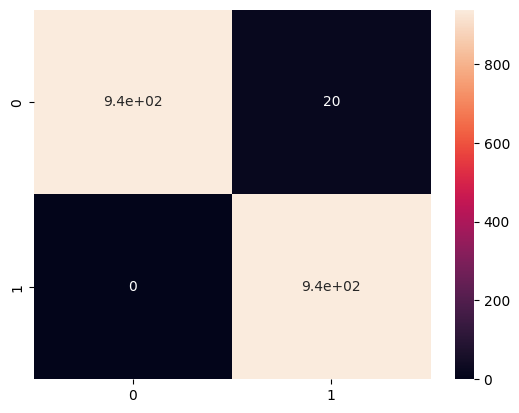

In [98]:
Train_model("SVC",SVC(C=1000,gamma=0.1))

# Visualising the accuracy of each Algorithm

[Text(0, 0, '35.81'),
 Text(0, 0, '75.92'),
 Text(0, 0, '97.68'),
 Text(0, 0, '99.21'),
 Text(0, 0, '98.94')]

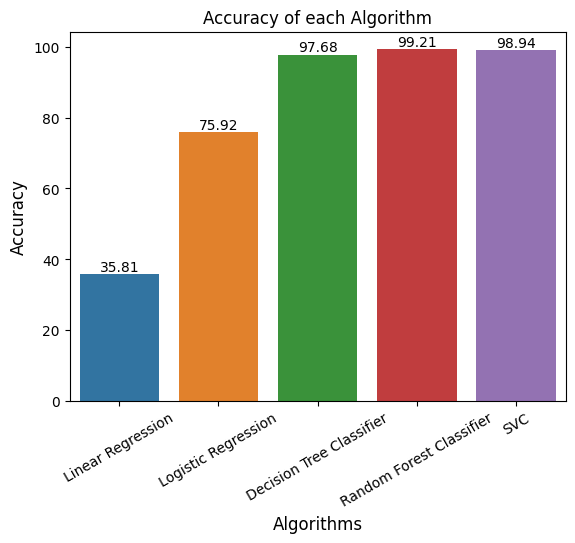

In [120]:
ax=sns.barplot(x=["Linear Regression","Logistic Regression","Decision Tree Classifier","Random Forest Classifier","SVC"],y=[35.81,75.92, 97.68,99.21,98.94])
plt.xticks(rotation=30)
plt.title("Accuracy of each Algorithm")
plt.xlabel("Algorithms",size=12)
plt.ylabel("Accuracy",size=12)
ax.bar_label(ax.containers[0])

# Random Forst Classifier

we can seen in the above graph that Random Forset Classifier has highest Accuracy of 99.21%

BY using <class 'sklearn.ensemble._forest.RandomForestClassifier'> Algorithm we get the accuray of 99.21%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       958
           1       0.98      1.00      0.99       936

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894



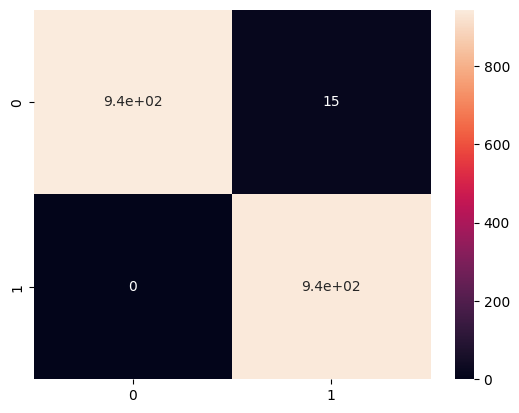

In [117]:
model=RandomForestClassifier(n_estimators=60)
model.fit(xtrain,ytrain)
result=model.score(xtest,ytest)
accuracy=result*100
predicted_values=model.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using {RandomForestClassifier} Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Saving the model

In [119]:
import pickle as p
p.dump(model,open("BrainStroke.p","wb"))